In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('./python-data-analysis-master/data/titanic_train.csv')
df_test = pd.read_csv("./python-data-analysis-master/data/titanic_test.csv")
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


## 불필요한 피처 제거하기


In [9]:
#데이터셋에서 name, ticket, body, home.dest 피처를 제거
df_train = df_train.drop(['name', 'ticket','body','cabin','home.dest'], axis =1)
df_test = df_test.drop(['name', 'ticket','body','cabin','home.dest'], axis =1)

# 탐색적 데이터 분석하기

0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

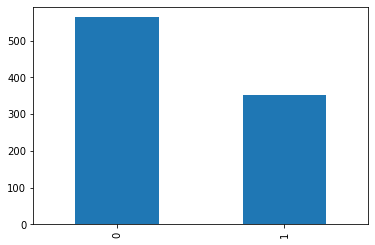

In [11]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


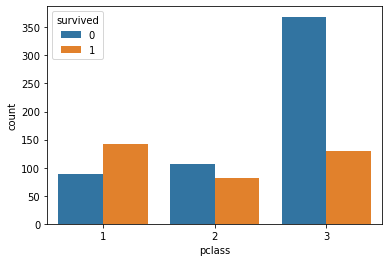

In [12]:
#survived 피처를 기준으로 그룹을 나누어 pclass 피처의 분포를 확인
print(df_train['pclass'].value_counts())

ax =  sns.countplot(x = 'pclass', hue = 'survived', data = df_train)

In [27]:
df_test['fare']

0        7.8958
1       21.0000
2       27.0000
3       14.5000
4       31.5000
         ...   
388      7.8542
389     21.0000
390      7.7500
391      7.7500
392    151.5500
Name: fare, Length: 393, dtype: float64

In [42]:
# 수치형 피처들에 대한 탐색
#분포, 표준편차, T-test 검정, Shapiro-wilk
#Shapiro-wilk  주어진 데이터가 얼마나 정규성을 따르는지 즉 얼마나 정규분포에 가까운지를 측정

from scipy import stats 

#두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check = True):
    #두 집단 (survived = 1, survived = 0)의 분포 그래프를 출력합니다
    g = sns.FacetGrid(df, col = 'survived')
    g.map(plt.hist, col_name, bins = 30)
    
    #두 집단 (survived = 1, survived = 0)의 표준편차를 각각 출력
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is','%.2f' % np.std(titanic_survived_static))
    
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is','%.2f' % np.std(titanic_n_survived_static))
    
    # T-test 두 집단의 평균 차이를 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name],equal_var=False)
    print("The t-statistic and p-valu assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-valu not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)    
    if distribution_check:
        #Shapiro-Wilk 검정: 분포의 정규성 정도를 검증
        print("The w-static and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-static and p-value in None-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))


data std is 14.22
data std is 13.71
The t-statistic and p-valu assuming equal variances is -0.546 and 0.585.
The t-statistic and p-valu not assuming equal variances is -0.543 and 0.587.
The w-static and p-value in Survived 0.982 and 0.001
The w-static and p-value in None-Survived 0.968 and 0.000
----------------------------------------------------------------
data std is 0.64
data std is 1.34
The t-statistic and p-valu assuming equal variances is -2.118 and 0.034.
The t-statistic and p-valu not assuming equal variances is -2.446 and 0.015.


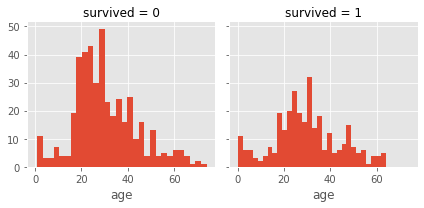

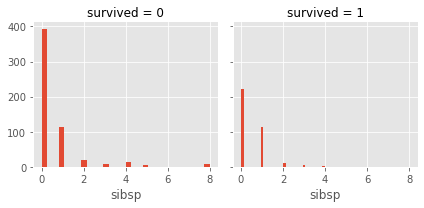

In [43]:
#자동화 함수 실행
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
print('----------------------------------------------------------------')
valid_features(df_train, 'sibsp', distribution_check=False)

#분석 결과 age피처는 두 그룹 간의 평균 차이가 없기 때문에 생존자 분류에 미치는 영향력이 낮음
#sibsp 피처에서 두 그룹간의 평균 차이가 어느정도 존재한 것을 볼수 있다 

male      581
female    335
Name: sex, dtype: int64
S    652
C    179
Q     83
Name: embarked, dtype: int64
data std is 0.74
data std is 0.89
The t-statistic and p-valu assuming equal variances is 1.865 and 0.063.
The t-statistic and p-valu not assuming equal variances is 1.942 and 0.052.
data std is 60.68
data std is 33.65
The t-statistic and p-valu assuming equal variances is 7.523 and 0.000.
The t-statistic and p-valu not assuming equal variances is 6.657 and 0.000.


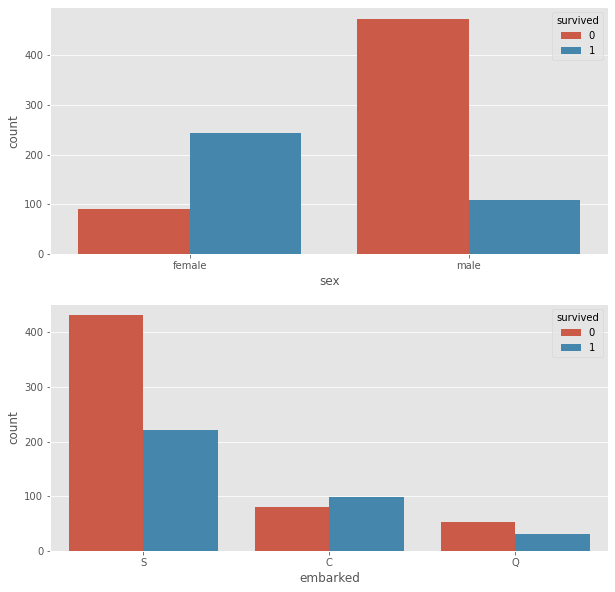

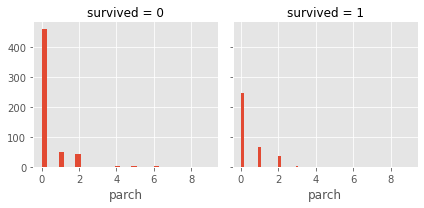

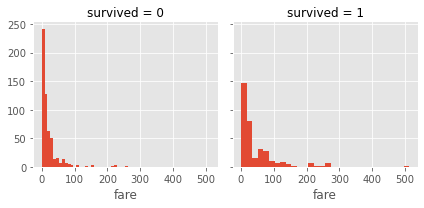

In [44]:
# valid_features(df_train, 'sex', distribution_check=False)
# valid_features(df_train, 'embarked', distribution_check=False)
plt.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(nrows=2)
figure.set_size_inches(10,10)
print(df_train['sex'].value_counts())
sns.countplot(x = 'sex', hue = 'survived', data = df_train, ax=ax1)
print(df_train['embarked'].value_counts())
sns.countplot(x = 'embarked', hue = 'survived', data = df_train, ax = ax2)
valid_features(df_train, 'parch', distribution_check=False)
valid_features(df_train, 'fare', distribution_check=False)



In [ ]:
#두 그룹 간의 분포 혹은 평균의 차이가 있는가 
#pclass O age X parch 세모, fare O , sex O embark 세모

# 분류: 생존자 분류 모델만들기 
- 로지스틱 회귀모델

#####  결측값 처리방법
1. 결측이 존재하는 데이터들을 삭제하는 방법
2. 평균값, 혹은 중앙값이나 최반값 등의 임의의 수치로 채워 넣는 방법

In [47]:
print(df_train.isnull().sum(), df_test.isnull().sum())

pclass        0
survived      0
sex           0
age         175
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64 pclass       0
survived     0
sex          0
age         88
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64


In [48]:
#범주형 데이터 원핫 인코딩사용

#age의 결측값을 평균값으로 대체합니다
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
#train의 평균값을 test에도 넣어준다
df_test['age'] = df_test['age'].fillna(replace_mean)

In [51]:
#embark : 2개의 결측 값을 최빈 값으로 대체 
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [52]:
#원-핫 인코딩을 위한 통합 데이터프레임(whole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#pandas 패키지를 이용한 원핫 인코딩 수행
whole_df_encode = pd.get_dummies(whole_df)
df_train =whole_df_encode[:train_idx_num]
df_test = whole_df_encode[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


## 분류 모델링: 로지스틱 회귀 모델
